## Inference Robertuit SA Peruvian Slangs

In [1]:
import torch
from datasets import load_dataset
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from tqdm.notebook import tqdm
import numpy as np
import pandas as pd

In [2]:
pd.set_option("max_colwidth", 300)

In [3]:
df = pd.read_excel(r'../Sample_Final12012024_sergiovr01.xlsx', dtype={
    'slangs': 'string',
    'text': 'string',
    'label': 'string'
})
df

,id,object_id,ID2,text,slangs,slangs_char_count,conjunto,Polaridad_TENTATIVA,TIENE_EMOJI_RECONOCIDO?,En Muestra_FINAL_Manual,ANNOTATOR,label
0,6609,818357438368658,6609-818357438368658,Estoy cerca a la molina 😊.. que xvre .. Para mis pequeñas,"xvre,",5,Chunk1,POSITIVO,SI,1,SERGIO,1
1,18894,653935986794869,18894-653935986794869,Decidamos todo! ❤ = Ing y 2k 👍= Vago y 7k,"vago,",5,Chunk1,POSITIVO,SI,1,SERGIO,0
2,23057,166951283038651,23057-166951283038651,Edyth J. Gamarra 😊 ahí nos vemos...siempre cansadas pero para el tono nooooooo,"tono,",5,Chunk1,POSITIVO,SI,1,SERGIO,2
3,65586,624101801451478,65586-624101801451478,Gente así fue el tono en Huaraz Carlos Gamboa Tati Kispe Jose V León Kevin Limaylla apunta esos tips para fin de mes Elaine Abril 😁😁🍺🍺,"tono,",5,Chunk1,POSITIVO,SI,1,SERGIO,0
4,152,1322849097815100,152-1322849097815100,Elizabeth escucha donde fue el tono jajaja 🤣🤣,"tono,",5,Chunk1,NEGATIVO,SI,1,SERGIO,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9197,36945,747297622507130,36945-747297622507130,Igual a ellos también le vas tirar m... cuando no funciona bien. Tu sabes las primeras citas son así de buena onda 😆,"tira,tirar,",11,chunk3,POSITIVO,SI,1,SERGIO,3
9198,84658,1319112772263570,84658-1319112772263570,Chinito un saludo para mi hijo LUCAS Y LUIGUI en Chimbote 21 de abril ✌✌❤❤,"lucas,luca,",11,chunk3,POSITIVO,SI,1,SERGIO,1
9199,185373,269660851242985,185373-269660851242985,Que te dije Lucas..tu y yo estamos.🤭😂,"lucas,luca,",11,chunk3,NEUTRAL,SI,1,SERGIO,2
9200,172500,458655262784358,172500-458655262784358,"Este monistro es tan parecido al tio lucas , en la cara y en el cerebro, hsbla huev....as🤮🤮🤮","lucas,luca,",11,chunk3,NEGATIVO,SI,1,SERGIO,3


In [4]:
df = df[df.label.isin(["2"])]
df = df.astype({'label':'int'})

In [19]:
def label_encode(x):
    if x == 1:#positive
        return 2
    if x == 2:#neutral
        return 1
    if x == 3:#negative
        return 0

# label to name
def label2name(x):
    if x == 0:
        return "Negative"
    if x == 1:
        return "Neutral"
    if x == 2:
        return "Positive"
        
def label_decode(x):
    if x == 2:#positive
        return 1
    if x == 1:#neutral
        return 2
    if x == 0:#negative
        return 3

In [6]:
df["label"] = df["label"].apply(lambda x: label_encode(x))
df["label_name"] = df["label"].apply(lambda x: label2name(x))

In [7]:
df

,id,object_id,ID2,text,slangs,slangs_char_count,conjunto,Polaridad_TENTATIVA,TIENE_EMOJI_RECONOCIDO?,En Muestra_FINAL_Manual,ANNOTATOR,label,label_name
2,23057,166951283038651,23057-166951283038651,Edyth J. Gamarra 😊 ahí nos vemos...siempre cansadas pero para el tono nooooooo,"tono,",5,Chunk1,POSITIVO,SI,1,SERGIO,1,Neutral
10,6102,526474777813957,6102-526474777813957,Amor Eduardo Pacheco Lecaros agendalo!! 😉,"leca,",5,Chunk1,POSITIVO,SI,1,SERGIO,1,Neutral
19,39470,5388274867901020,39470-5388274867901020,Valentin Lobato nose porq pensé en ti 🤔,"loba,",5,Chunk1,NEGATIVO,SI,1,SERGIO,1,Neutral
22,87430,3587570224801810,87430-3587570224801810,"...Loba estas, juguemos a la ronda mientras la loba esta, loba estas??🤣🤣🤣🤣","loba,",5,Chunk1,NEGATIVO,SI,1,SERGIO,1,Neutral
35,59827,427622817959508,59827-427622817959508,Rafa Nancay Huillca hay una loza que se parece a la jato de tu ex 🤣🤣,"jato,",5,Chunk1,NEGATIVO,SI,1,SERGIO,1,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9179,35285,340255308328201,35285-340255308328201,Quien es la gordita 😅🤌🏼🤌🏼😂😂,"la gordita,",11,chunk3,NEUTRAL,SI,1,SERGIO,1,Neutral
9180,72690,907019600716037,72690-907019600716037,😂jajaja la gordita de mostró Conoce a todos de la empresa genecis.,"la gordita,",11,chunk3,NEUTRAL,SI,1,SERGIO,1,Neutral
9191,22623,1577509765705500,22623-1577509765705500,"Milagros Reyes Mitchell fuguemos a Cabo Blanco, pasaje sin retorno, Lucas, tú y yo 😍","lucas,luca,",11,chunk3,POSITIVO,SI,1,SERGIO,1,Neutral
9195,170412,436557564064958,170412-436557564064958,Tanta gente te ve que tienes que publicarlo aqui por el face tus entrevista mi querido lucas 🙃,"lucas,luca,",11,chunk3,NEGATIVO,SI,1,SERGIO,1,Neutral


In [8]:
# model_name = "pyupeu/robertuito-peruvian-sentiment"
model_name = "pysentimiento/robertuito-sentiment-analysis"
max_length = 128
model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=3
)
tokenizer = AutoTokenizer.from_pretrained(model_name)
tokenizer.model_max_length = max_length

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [9]:
from pysentimiento.preprocessing import preprocess_tweet
# test_df = ds['test'].to_pandas()
df['text_original'] = df['text'] 
df["text"] = df["text"].apply(lambda x: preprocess_tweet(x, lang="es"))
test_df = df

2024-04-25 14:24:00.076094: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-25 14:24:00.112168: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-25 14:24:00.112194: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-25 14:24:00.113321: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-25 14:24:00.119547: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructio

In [20]:
test_df.sample(10)

,id,object_id,ID2,text,slangs,slangs_char_count,conjunto,Polaridad_TENTATIVA,TIENE_EMOJI_RECONOCIDO?,En Muestra_FINAL_Manual,ANNOTATOR,label,label_name,text_original,pred,pred_name
3272,62210,1545330855601660,62210-1545330855601660,BtoRoman estamos miércoles emoji cara con ojos en blanco emoji,"miércoles,",10,chunk2,NEGATIVO,SI,1,SERGIO,1,Neutral,BtoRoman estamos miércoles 🙄,0,Negative
4040,120362,4382265671844300,120362-4382265671844300,No Brotherhood una tabla cantando Por cierto Gracias por las clases emoji mano con señal de victoria emoji PAZ Me ban a Funar ^-^,"brother,",8,chunk2,POSITIVO,SI,1,SERGIO,1,Neutral,No Brotherhood una tabla cantando Por cierto Gracias por las clases ✌ PAZ Me ban a Funar ^-^,1,Neutral
8633,25533,804730454387157,25533-804730454387157,Churra cruda tiene razón pa asarse con perro flaco alias Jimy emoji cara llorando de risa emoji emoji cara revolviéndose de la risa emoji emoji cara llorando de risa emoji emoji cara revolviéndose de la risa emoji emoji cara revolviéndose de la risa emoji,"asarse,flaco,",13,chunk3,NEUTRAL,SI,1,SERGIO,1,Neutral,Churra cruda tiene razón pa asarse con perro flaco alias Jimy 😂🤣😂🤣🤣,0,Negative
4689,11674,764654267072309,11674-764654267072309,Ohhh por faaa pásame el dato de la tienda donde puedo adquirir las muñequitas de Bella y Bestia que sale casi al principio del video. Gracias,"bestia,",7,chunk2,POSITIVO,SI,1,SERGIO,1,Neutral,Ohhhh por faaa pásame el dato de la tienda donde puedo adquirir las muñequitas de Bella y Bestia que sale casi al principio del video. Gracias ☺️,1,Neutral
5577,61220,571495367154094,61220-571495367154094,"Maiden, la debilidad de todo otaku ? emoji cara revolviéndose de la risa emoji emoji cara de por favor emoji","otaku,",6,chunk2,POSITIVO,SI,1,SERGIO,1,Neutral,"Maiden, la debilidad de todo otaku ? 🤣🥺",1,Neutral
1035,14689,1314468239030880,14689-1314468239030880,PRIMERO QUE NADA ESTA EL BIENESTAR DE LOS NIÑOS ESOS CABEZA DE POLLOS NO PENSARON NI ESO!! INCREIBLE SALUDOS IWOO emoji manos aplaudiendo emoji,"cabeza de pollo,pollo,",22,chunk2,POSITIVO,SI,1,SERGIO,1,Neutral,PRIMERO QUE NADA ESTA EL BIENESTAR DE LOS NIÑOS ESOS CABEZA DE POLLOS NO PENSARON NI ESO!! INCREIBLE SALUDOS IWOO 👏,2,Positive
6211,473,1157451784658850,473-1157451784658850,"Jjaja Cristian, te pasaste, eres de lo peor jaja, pobre China, se estaba ahogando emoji cara sonriendo con sudor frío emoji la próxima avísale no?... mínimo emoji cara feliz con ojos sonrientes emoji","china,",6,chunk2,POSITIVO,SI,1,SERGIO,1,Neutral,"Jajaja Cristian, te pasaste, eres de lo peor jajaja, pobre China, se estaba ahogando 😅 la próxima avísale no?... mínimo 😊",0,Negative
5999,11861,764654267072309,11861-764654267072309,Wilfredo Cruz Narro varios d nuestros points emoji cara guiñando el ojo emoji,"point,",6,chunk2,POSITIVO,SI,1,SERGIO,1,Neutral,Wilfredo Cruz Narro varios d nuestros points 😉,2,Positive
7368,47492,606449768157598,47492-606449768157598,"Una vez le pregunté a una cebra si era blanca con rayas negras o negra con rayas blancas, me respondió: ""¿¿Tú Eres Feliz Con Momentos Tristes O Triste Con Momentos Felices??"", ahí decidí dejar de andar preguntando pendejadas y menos a los animales que se supone que no hablan.","anda,pendejada,raya,blanca,habla,",33,chunk3,NEGATIVO,SI,1,SERGIO,1,Neutral,"Una vez le pregunté a una cebra si era blanca con rayas negras o negra con rayas blancas, me respondió: ""¿¿Tú Eres Feliz Con Momentos Tristes O Triste Con Momentos Felices??"", ahí decidí dejar de andar preguntando pendejadas y menos a los animales que se supone que no hablan. ☹️",0,Negative
5316,1655,1681778055669150,1655-1681778055669150,"Los primeros chicharrones de mi vida los probé en Lurin, pero realmente este es el de los mejores, que recuerdo Arnaldo y Miguel, del Perú emoji bandera perú emoji para el mundo emoji globo terráqueo mostrando américa emoji . El mejor Sándwich.","chicha,",7,chunk2,POSITIVO,SI,1,SERGIO,1,Neutral,"Los primeros chicharrones de mi vida los probé en Lurin, pero realmente 

In [11]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model.cuda()

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(30002, 768, padding_idx=1)
      (position_embeddings): Embedding(130, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
             

In [12]:
# We do this to view predictions in the pandas dataframe and easily filter them and perform error analysis.
pred_test_final = []

for i, row in tqdm(test_df.iterrows(), total=test_df.shape[0]):
    predictions = []

    text = row["text"]
    encoded_data_test_single = tokenizer.batch_encode_plus([text], 
    # add_special_tokens=config.add_special_tokens, 
    # return_attention_mask=config.return_attention_mask, 
    # pad_to_max_length=config.pad_to_max_length, 
    max_length=128,
    # return_tensors=config.return_tensors
    return_tensors="pt"
    )
    input_ids_test = encoded_data_test_single['input_ids']
    attention_masks_test = encoded_data_test_single['attention_mask']

    
    inputs = {'input_ids':      input_ids_test.to(device),
              'attention_mask':attention_masks_test.to(device),
             }

    with torch.no_grad():        
        outputs = model(**inputs)
    
    logits = outputs[0]
    logits = logits.detach().cpu().numpy()
    predictions.append(logits)
    predictions = np.concatenate(predictions, axis=0)
    pred_test_final.append(np.argmax(predictions, axis=1).flatten()[0])

  0%|          | 0/2651 [00:00<?, ?it/s]

In [13]:
# add pred into val_df
test_df["pred"] = pred_test_final
# label to intent mapping
name2label = {"Negative":0,
              "Neutral":1,
             "Positive":2
             }
label2name = {v: k for k, v in name2label.items()}

test_df["pred_name"] = test_df.pred.apply(lambda x: label2name.get(x)) 

In [21]:
len(test_df)

2651

In [22]:
df["label"] = df["label"].apply(lambda x: label_decode(x))
df["pred"] = df["pred"].apply(lambda x: label_decode(x))

In [24]:
# test_df.to_excel('../Sample_final_neutales_corregidos.xlsx', index=False)

In [23]:
test_df.sample(20)

,id,object_id,ID2,text,slangs,slangs_char_count,conjunto,Polaridad_TENTATIVA,TIENE_EMOJI_RECONOCIDO?,En Muestra_FINAL_Manual,ANNOTATOR,label,label_name,text_original,pred,pred_name
293,2905,387599299189259,2905-387599299189259,Dany Darko Darkles emoji cara llorando de risa emoji emoji cara llorando de risa emoji cualquier parecido con la realidad es pura coincidencia emoji fantasma emoji,"dark,",5,Chunk1,NEUTRAL,SI,1,SERGIO,2,Neutral,Dany Darko Darkles 😂😂 cualquier parecido con la realidad es pura coincidencia 👻,2,Neutral
4344,43232,1313086139106630,43232-1313086139106630,William Kevin Marez Charles como que los pokemon son japoneses? emoji cara neutral emoji,"pokemon,",8,chunk2,NEGATIVO,SI,1,SERGIO,2,Neutral,William Kevin Marez Charles como que los pokemon son japoneses? 😐,3,Negative
1202,208654,731285401274716,208654-731285401274716,"Para bronquios neumonia es BUENAZO EL WITO. es un remedio casero una primita nació cn bronquios neumonia y se sano cn WITO. En realidad los hijos no tienen la culpa d nada, la culpa son d los padres emoji cara de desaprobación emoji","casero,buenazo,sano,",20,chunk2,NEGATIVO,SI,1,SERGIO,2,Neutral,"Para bronquios neumonia es BUENAZO EL WITO. es un remedio casero una primita nació cn bronquios neumonia y se sano cn WITO. En realidad los hijos no tienen la culpa d nada, la culpa son d los padres 😒",2,Neutral
1768,39425,644658356073993,39425-644658356073993,Danniela Rivers Rivers mira todo lo que había por tu casa y de monces solo comiendo lo mismo en el delivery o centro comercial... emoji cara de desaprobación emoji,"comercial,monce,",16,chunk2,NEGATIVO,SI,1,SERGIO,2,Neutral,Danniela Rivers Rivers mira todo lo que había por tu casa y de monces solo comiendo lo mismo en el delivery o centro comercial... 😒,3,Negative
4901,26665,8910042552403230,26665-8910042552403230,"Kaiser , tenías que pechar emoji cara con sudor frío emoji","pechar,",7,chunk2,NEUTRAL,SI,1,SERGIO,2,Neutral,"Kaiser , tenías que pechar 😓",3,Negative
5064,11457,1691960471192130,11457-1691960471192130,"Jjaja.!! Pero para que gente pituca si ellos se pueden ir del país. Tu Pedrito, es cambio la solución y igualdad ante todo emoji cara revolviéndose de la risa emoji .","pituca,",7,chunk2,NEGATIVO,SI,1,SERGIO,2,Neutral,"Jajaja.!! Pero para que gente pituca si ellos se pueden ir del país. Tu Pedrito, es cambio la solución y igualdad ante todo 🤣.",2,Neutral
2631,4106,2011033479151730,4106-2011033479151730,Edson ya sabes con nuestro arroz con pollo y ceviche emoji cara feliz con ojos sonrientes emoji,"arroz,pollo,",12,chunk2,POSITIVO,SI,1,SERGIO,2,Neutral,Edson ya sabes con nuestro arroz con pollo y ceviche 😊,1,Positive
2951,21402,1514107845305980,21402-1514107845305980,Yo también me chupe ! emoji mono con los ojos tapados emoji la próxima - si me vuelven a invitar jijiji - me acerco,"chup,chupe,",11,chunk2,POSITIVO,SI,1,SERGIO,2,Neutral,Yo también me chupe ! 🙈 la próxima - si me vuelven a invitar jijiji - me acerco,2,Neutral
4781,7685,1564655590648220,7685-1564655590648220,"La gente bien patera como la engañan,si Soraya se robo el show emoji cara con ojos en blanco emoji","patera,",7,chunk2,NEGATIVO,SI,1,SERGIO,2,Neutral,"La gente bien patera como la engañan,si Soraya se robo el show 🙄",3,Negative
3744,73060,1171515626970960,73060-1171515626970960,Mñn vendo el auto y vuelvo ala mototaxi emoji cara babeando emoji emoji cara revolviéndose de la risa emoji emoji cara revolviéndose de la risa emoji,"mototaxi,",9,chunk2,NEGATIVO,SI,1,SERGIO,2,Neutral,Mñn vendo el auto y vuelvo ala mototaxi 🤤🤣🤣,2,Neutral


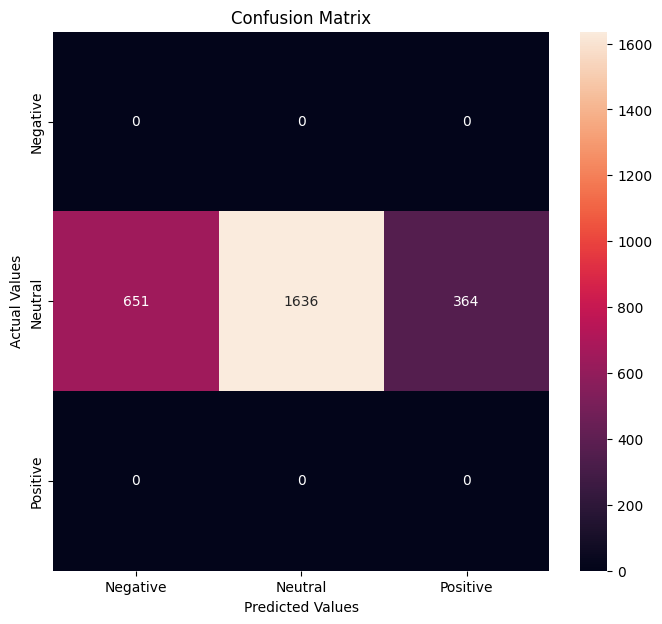

In [17]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

pred_name_values = test_df.pred_name.values
label_values = test_df.label_name.values
cm = confusion_matrix(label_values, pred_name_values)
cm_df = pd.DataFrame(cm,
                     index = ['Negative','Neutral','Positive'], 
                     columns = ['Negative','Neutral','Positive'])
plt.figure(figsize=(8,7))
sns.heatmap(cm_df, annot=True,fmt=".0f")
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [18]:
from sklearn.metrics import classification_report
classification_rep = classification_report(label_values, pred_name_values, digits=5)

print(classification_rep)

              precision    recall  f1-score   support

    Negative    0.00000   0.00000   0.00000         0
     Neutral    1.00000   0.61713   0.76324      2651
    Positive    0.00000   0.00000   0.00000         0

    accuracy                        0.61713      2651
   macro avg    0.33333   0.20571   0.25441      2651
weighted avg    1.00000   0.61713   0.76324      2651



/home/darkstar/anaconda3/envs/robertuito-env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/darkstar/anaconda3/envs/robertuito-env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/darkstar/anaconda3/envs/robertuito-env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap